Bonjour, commencez à rentrez votre nom : l


BIENVENUE l !


Notre application a pour but de vous aider à identifier les différents drapeaux des équipages dans One Piece.
Vous avez le choix d'utiliser notre bibliothèque d''images avec plusieurs bateaux ou vous pouvez utiliser votre image.

Tapez 1 pour notre collection d'images ou 2 pour votre image :
1


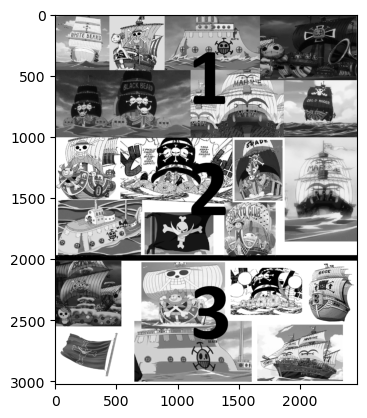

Choisir parmis les 3 images au dessus selon leur numero (1, 2 ou 3) : 

1


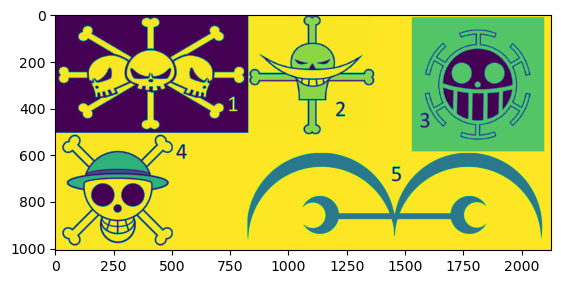

Choisissez le numéro de drapeau que vous voulez reconnaitre ou 6 pour faire retour au menu :
1
Fonction non implémentée


In [35]:
import cv2
from matplotlib import pyplot as plt
import sys #L'importation de cette bibliothèque permet de quitter l'application avec la commande sys.exit(0)

# ------------------------------------------------------------------------------------------------------------------

#Charger les images. 

#Notre bibliothèque de bateaux 
bat1 = cv2.imread('C:\\Users\\huber\\Desktop\\Projet_TRAN_GEOFFRAY\\images\\bateau1.jpeg',cv2.IMREAD_GRAYSCALE)
bat2 = cv2.imread('C:\\Users\\huber\\Desktop\\Projet_TRAN_GEOFFRAY\\images\\bateau2.jpeg',cv2.IMREAD_GRAYSCALE)
bat3 = cv2.imread('C:\\Users\\huber\\Desktop\\Projet_TRAN_GEOFFRAY\\images\\bateau3.jpg',cv2.IMREAD_GRAYSCALE)

#Illustration de bateaux et drapeaux avec leur numéro
ill1 = cv2.imread('C:\\Users\\huber\\Desktop\\Projet_TRAN_GEOFFRAY\\images\\illbateau1.jpeg',cv2.IMREAD_GRAYSCALE)
ill2 = cv2.imread('C:\\Users\\huber\\Desktop\\Projet_TRAN_GEOFFRAY\\images\\illbateau2.jpeg',cv2.IMREAD_GRAYSCALE)
ill3 = cv2.imread('C:\\Users\\huber\\Desktop\\Projet_TRAN_GEOFFRAY\\images\\illbateau3.jpg',cv2.IMREAD_GRAYSCALE)
ill4 = cv2.imread('C:\\Users\\huber\\Desktop\\Projet_TRAN_GEOFFRAY\\images\\jolly_roger.jpeg',cv2.IMREAD_GRAYSCALE)

#Notre bibliothèque de drapeaux (images de bases)
drap1 = cv2.imread('C:\\Users\\huber\\Desktop\\Projet_TRAN_GEOFFRAY\\images\\bateau1.jpeg',cv2.IMREAD_GRAYSCALE)
drap2 = cv2.imread('C:\\Users\\huber\\Desktop\\Projet_TRAN_GEOFFRAY\\images\\bateau1.jpeg',cv2.IMREAD_GRAYSCALE)
drap3 = cv2.imread('C:\\Users\\huber\\Desktop\\Projet_TRAN_GEOFFRAY\\images\\bateau1.jpeg',cv2.IMREAD_GRAYSCALE)
drap4 = cv2.imread('C:\\Users\\huber\\Desktop\\Projet_TRAN_GEOFFRAY\\images\\bateau1.jpeg',cv2.IMREAD_GRAYSCALE)
drap5 = cv2.imread('C:\\Users\\huber\\Desktop\\Projet_TRAN_GEOFFRAY\\images\\bateau1.jpeg',cv2.IMREAD_GRAYSCALE)


batdef = bat1   #Déclaration et initialisation de batdef
                #Cela corespond à l'image de groupe qui possède plusieurs drapeau à déterminer 
    
drapdef = drap1 #Déclaration et initialisation de drapdef
                #Cela correspond au drapeau qui va etre utiliser pour le trouver sur l'image 

choixBateau = 0
choixDrapeau = 0

# -------------------------------------------------------------------------------------------------------------------

# Définitions des fonctions :

# -------------------------------------------------------------------------------------------------------------------

#Fonction Menu pour permettre a l'utilisateur de revenir et changer l'image des bateaux 
def menu():
    print('')
    print("Tapez 1 pour notre collection d'images ou 2 pour votre image :")
    
    choixImage = int(input())
    
    while choixImage not in [1,2,3]:
        choixImage = int(input("Erreur : Veuillez tapez 1 ou 2. 3 pour quitter l'aplication :"))  
    else:
        if (choixImage == 3):
            sys.exit(0)
        else:          
            imagesBat(choixImage)
    
    
#Fonction pour concatener les images de notre bibliothèque de bateaux 
def afficherBateaux(img1, img2, img3):
     
    if img1 is None or img2 is None or img3 is None:
        print("Erreur : Une ou plusieurs images n'ont pas été chargées correctement.")
        return
        
    min_width = min(img1.shape[1], img2.shape[1], img3.shape[1])
    img1 = img1[:, :min_width]
    img2 = img2[:, :min_width]
    img3 = img3[:, :min_width]

    # Concaténer les images verticalement
    img_concat = cv2.vconcat([img1, img2, img3])

    # Afficher l'image concaténée à l'aide de Matplotlib
    plt.imshow(img_concat, cmap='gray')
    plt.show()
    
    
#Fonction qui permet à l'utilisateur de choisir le drapeau à chercher 
def imagesDrap():  
    bon = False  #Erreur saisie utilisateur 
    
    while (bon == False):
        plt.imshow(ill4)      #Afficher les drapeaux 
        plt.show()
        print('Choisissez le numéro de drapeau que vous voulez reconnaitre ou 6 pour faire retour au menu :')
        choixDrapeau = int(input())
        
        if (choixDrapeau == 1 ):
            bon = True 
            drapdef = drap1
            ORB(batdef, drapdef)
        elif (choixDrapeau == 2):
            bon = True 
            drapdef = drap2
            ORB(batdef, drapdef)
        elif (choixDrapeau == 3):
            bon = True 
            drapdef = drap3
            ORB(batdef, drapdef)
        elif (choixDrapeau == 4):
            bon = True 
            drapdef = drap4
            ORB(batdef, drapdef)
        elif (choixDrapeau == 5):
            bon = True 
            drapdef = drap5
            ORB(batdef, drapdef)
        elif (choixDrapeau == 6):
            bon = True
            menu()
        else:
            print('Erreur : Choisissez un bon numéro [1-5]. Tapez 6 pour retour menu : ')
           
    
def imagesBat(choix):
        bon = False    #Variable bool pour gérer erreur de saisie
        while bon == False:
            
            if (choix == 1):
                afficherBateaux(ill1, ill2, ill3)     #Appel fonction pour afficher nos images d'illustrations
                print("Choisir parmis les 3 images au dessus selon leur numero (1, 2 ou 3) : \n")
                choixBateaux = int(input())
        
                if (choixBateaux == 1):
                    bon = True 
                    batdef = bat1  
                    imagesDrap() 
                elif (choixBateaux == 2):
                    bon = True 
                    batdef = bat2
                    imagesDrap()
                elif (choixBateaux == 3):
                    bon = True 
                    batdef = bat3
                    imagesDrap()
                elif (choixBateaux == 0):
                    bon = True 
                    menu()
                else:
                    print('Erreur : choisissez un bon numéro. Tapez 4 pour revenir au menu')
                    
            elif (choix == 2):
                print("Veuilez déposer votre image en format jpeg dans le dossier 'images' puis entrez le nom de votre image :")
                nom = input()
                print(nom)
                imgUti = cv2.imread('C:\\Users\\huber\\Desktop\\Projet_TRAN_GEOFFRAY\\images\\images_utilisateur\\'+ nom + '.jpeg',cv2.IMREAD_GRAYSCALE)
                
                if nom == '4':       
                    bon = True 
                    menu()
                
                if imgUti is None:    #Cas erreur si chemin vers image est incorrect
                    print("Erreur : Votre image n'a pas été chargée correctement. Recommencez ou tapez 0 pour retourner au menu")
                else:
                    bon = True 
                    print("Votre image a été chargée correctement")
                    plt.imshow(imgUti)   #Affichage image de l'utilisateur 
                    plt.show()         
                    batdef = imgUti              
                    imagesDrap()
                    
                    
#Fonction qui permet détecter et afficher le drapeau qui correspond selon les bateaux sur l'image 
def ORB(bat, drap):
    print('Fonction non implémentée')
    
    #Détecter et afficher drapeau sur les bateaux avec les fonction ORB
    
    #Permettre de faire retour pour faire avec un autre drapeau avec imagesBat()
    
    #Faire retour au menu principal avec Menu()
     
        
        
# --------------------------------------------------------------------------------------------------------------------     
        
# Main 
a = input('Bonjour, commencez à rentrez votre nom : ')

print('\n')

print('BIENVENUE',a, '!')
print('\n')
print('Notre application a pour but de vous aider à identifier les différents drapeaux des équipages dans One Piece.')
print("Vous avez le choix d'utiliser notre bibliothèque d''images avec plusieurs bateaux ou vous pouvez utiliser votre image.")


menu()




